# [Linear Regression With Time Series](https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series)

The data we'll be working with in this course describes the number of dispenses in Australia of medicines subsidised under the [Pharmaceutical Benefits Scheme](https://www.pbs.gov.au/pbs/home). Scripts used to load and prepare dispense data for analysis can be found [here](https://github.com/wongd-hub/data-sci-practice/tree/main/pbs-time-series).

In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline
import seaborn as sns
import numpy as np
import random as rd
from sklearn.linear_model import LinearRegression

DoS stands for Date of Supply, and references the fact that dispenses are recorded in this dataset the date that the medicine was actually supplied (as opposed to the date that the claim was lodged).

In [10]:
dos = pd.read_csv(
    '../../../pbs-time-series/prepped_data/dos_final.csv',
    index_col = ['month', 'pbs_item_code', 'atc_level_2'],
    parse_dates = ['month'],
)[['prescriptions']]
dos.head()

prescriptions
month      pbs_item_code atc_level_2               
2017-07-01 01002R        S01                   2306
           01003T        J05                    106
           01004W        S01                   4188
           01007B        J05                   2359
           01010E        B01                    706

We can see that this dataset provides us with the number of prescriptions dispensed for each medicine (medicine, strength, and pack size - as represented by each PBS item code). This data also provides us with several levels of each medicine's [Anatomical Therapeutic Chemical](https://www.who.int/tools/atc-ddd-toolkit/atc-classification) classification, which describes the body system that each drug acts on.

## Core Lesson



Text(0.5, 0, 'Months since 2017-07-01')

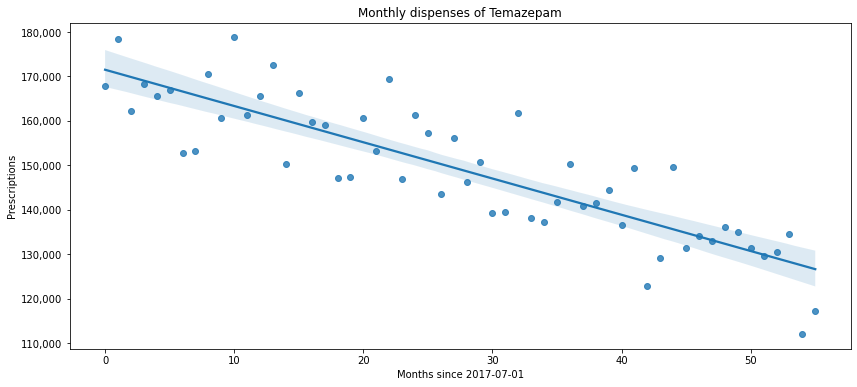

In [15]:
# Time-step features
dos_temazepam = dos.loc[:, '02089Y', 'N05'].copy()
dos_temazepam['time_dummy'] = np.arange(len(dos_temazepam.index))

# Plot
plt.figure(figsize = (14, 6))
plt.title("Monthly dispenses of Temazepam")

temazepam_plt = sns.regplot(data = dos_temazepam, x = 'time_dummy', y = 'prescriptions')
temazepam_plt.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.ylabel('Prescriptions')
plt.xlabel(f'Months since {dos_temazepam.index.min():%Y-%m-%d}')

Text(0.5, 0, 'Prescriptions (Lag: 1 month)')

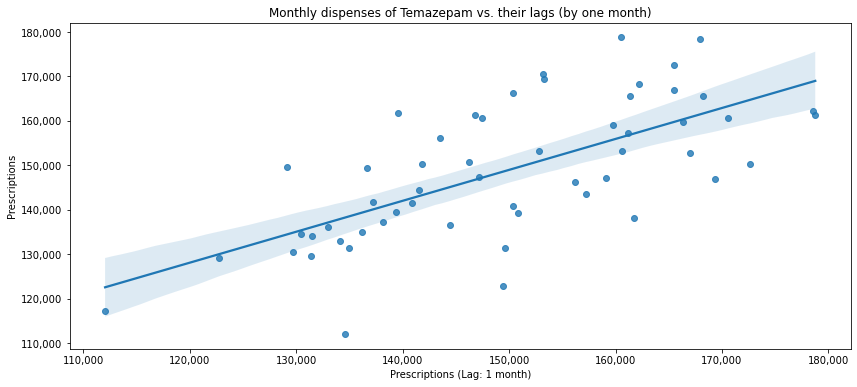

In [12]:
# Lag features
dos_temazepam['lag_1'] = dos_temazepam['prescriptions'].shift(1)

# Plot
plt.figure(figsize = (14, 6))
plt.title("Monthly dispenses of Temazepam vs. their lags (by one month)")

temazepam_lags = sns.regplot(x = 'lag_1', y = 'prescriptions', data = dos_temazepam)
temazepam_lags.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
temazepam_lags.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.ylabel('Prescriptions')
plt.xlabel(f'Prescriptions (Lag: 1 month)')

In [16]:
# Naive prediction using linear regression on time dummy

# Training data
X = dos_temazepam.loc[:, ['time_dummy']]
y = dos_temazepam.loc[:, 'prescriptions']

# Training the model
temazepam_time_lm = LinearRegression()
temazepam_time_lm.fit(X, y)

# Storing fitted values as time series 
y_pred = pd.Series(temazepam_time_lm.predict(X), index = X.index)

Text(0.5, 0, 'Prescriptions (Lag: 1 month)')

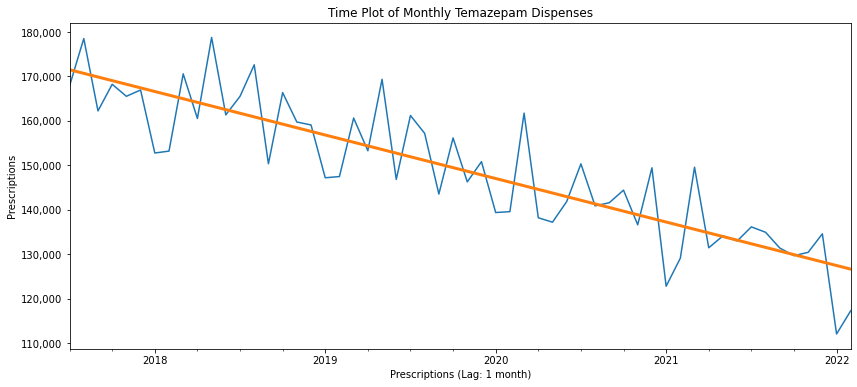

In [20]:
# Plot
plt.figure(figsize = (14, 6))
plt.title("Monthly dispenses of Temazepam - linear regression model")

tzp_time_ax = y.plot()
tzp_time_ax = y_pred.plot(ax = tzp_time_ax, linewidth = 3)

tzp_time_ax.set_title('Time Plot of Monthly Temazepam Dispenses')
tzp_time_ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.ylabel('Prescriptions')
plt.xlabel(f'Prescriptions (Lag: 1 month)')